# Assignment 1 - Jayden Prakash

## Part 1 - Short Answer

#### <b>Question 1</b> - What is supervised learning? What are two purposes/goals? How do these different goals change our approach?


Supervised learning is a form of machine learning where we use a given set of inputs and outputs  to predict a new set of outputs given a new set of inputs. Previous data is usually used in order to train the algorithm in order to provide accurate predictions. One of the purposes of supervised learning is to classify data based on models which have been developed already and the other purpose is to make predictions of future outcomes based on these models. If you are wanting to predict a discrete variable such as if Something is 1 or 0, you would use a classifcation model, however if you were wanting to predict outcomes based on models or parameters you would use regression as these provide continuous variables which are usually used in predictions.

#### <b> Question 2 </b> - How do obtain insights about a problem using linear regression?

Linear regression is what is known as a parametric model. A parametric model learns from the parameters that describe the problem radther than predicting from past instances, as such the predictions are informed by the parameters. Linear regression uses two types of variables, the dependent variable which is what is being measured and the independent variables which is what is used to predict. Its represented by a linear equation that takes a given set of inputs that produce a solution which is the predicted output for that set of inputs. The equation assigns coefficients for each input value that is a scale factor and is also accompanied by a bias coefficient. By using this linear equation we are able to find inisghts by predicting a specific value based on its inputs

#### <b> Question 3 </b> - What is cross validation? How does cross validation obtain an honest estimate of performance? What is one drawback?

Cross validation is a method to measure or evaluate learning models. It obtains an honest estimate by using K-fold cross validation where for a set of data you specify <b><i> k </i></b> folds, and each instance of data is mapped to a fold. Then for each fold, you take out the data that is mapped to it, and use the remaning data to train the model; once that is done you may use the data that you held out earlier to test the data. This is honest because it was tested on data that was not used in training. It is good because it uses the entire dataset instead of just some of it, one big drawback however is that it is quite computationally expensive, requiring you to run it <b> (k * r) + 1 </b> times per model where r is the number of times you need to repeat to assign data to folds.

## Part 2 - Data Wrangling and Exploratory Data Analysis

Import neccesary modules.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

from matplotlib import pyplot as plt

from statsmodels.graphics.correlation import plot_corr

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, RepeatedKFold, train_test_split, cross_val_score
from sklearn.metrics import  r2_score, make_scorer

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree



Import CSV Files

In [2]:
long_measurements = pd.read_csv('measurements.csv')
visits = pd.read_csv('site_visits.csv')
sites = pd.read_csv('water_quality_sites.csv')

#### Measurements Dataframe

For the measurements dataframe, all data pertains to measurements except the checksum which is used as a unique identifier for the column, this will be removed at the end as it doesnt describe any useful measurements or data for the model but is being kept in for now for merging purposes.

In [3]:
## convert measurements.csv from long to wide
measurements = long_measurements.pivot(index ='checksum', columns='Measurement', values ='Value').reset_index()


measurements.info()

measurements.dropna( inplace=True)
measurements.describe()
measurements

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29187 entries, 0 to 29186
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   checksum                      29187 non-null  object 
 1   Absorbance Coefficient        29098 non-null  float64
 2   Ammonia                       28152 non-null  float64
 3   Cloud Cover                   28470 non-null  float64
 4   Dissolved Oxygen Saturation   28977 non-null  float64
 5   Dissolved Reactive Phosphate  29107 non-null  float64
 6   E Coli                        14120 non-null  float64
 7   Electrical Conductivity       29135 non-null  float64
 8   Nitrate + Nitrite             29107 non-null  float64
 9   Ring Temp                     29137 non-null  float64
 10  Total Nitrogen                28058 non-null  float64
 11  Total Phosphate               29052 non-null  float64
 12  Turbidity                     29140 non-null  float64
 13  W

Measurement                          checksum  Absorbance Coefficient  \
0            0009f4e7ab7d5d41c2280b7f5398e952                    0.62   
2            0013bf1972cd17f3ddc78c06fa1c4717                    6.10   
3            00149a2788790394de6a7559f79a50bb                   19.35   
5            00158d7411b64c2ce549e5201a20f170                    3.50   
6            00186e71fb6f9ac1c1872c87dcd2400c                    0.06   
...                                       ...                     ...   
29174        ffd7ff4bdf1e6eee74554226c940188c                    1.60   
29177        ffd91671b643b411084777b437713038                    2.10   
29183        ffee6bb921d1b1cf0c386325422a8f1c                    3.50   
29185        fff224af9c3d20e1b32645aadca78da8                    2.60   
29186        fff256249dd2764727b920b0c0da8cdd                    4.20   

Measurement  Ammonia  Cloud Cover  Dissolved Oxygen Saturation  \
0                3.0          7.0                        103.8   
2                2.0          0.0                         99.2   
3               17.0          4.0                         93.9   
5               19.0          8.0                        100.8   
6                1.0          7.0                        101.7   
...              ...          ...                          ...   
29174            3.0          1.0                        101.7   
29177           10.0          8.0                        106.5   
29183           14.0          0.0                        100.7   
29185            8.0          8.0                         96.8   
29186            8.0          8.0                        103.3   

Measurement  Dissolved Reactive Phosphate  E Coli  Electrical Conductivity  \
0                                     0.4    21.3                     60.4   
2                                     2.6    90.7                    121.5   
3                                    13.8   157.6                    205.0   
5                                     5.4   344.8                    143.0   
6                                     1.5     6.3                    121.5   
...                                   ...     ...                      ...   
29174                                 1.7     0.0                     69.8   
29177                                 5.8    76.6                     97.1   
29183                                 3.9    63.1                    368.0   
29185                                 5.2   365.4                     90.0   
29186                                17.8   686.7                    117.9   

Measurement  Nitrate + Nitrite  Ring Temp  Total Nitrogen  Total Phosphate  \
0                         37.0  12.649111            70.0              5.0   
2                         17.0  14.915763            75.0              8.0   
3                        262.0 -14.948244           695.0             45.0   
5                        696.0 -15.596474           778.0             10.0   
6                          1.0 -15.155197            64.0              3.0   
...                        ...        ...             ...              ...   
29174                     14.0 -13.326665           171.0             18.0   
29177                    475.0 -15.654073           603.0             26.0   
29183                    295.0  15.010996           452.0             21.0   
29185                    325.0 -15.684387           472.0              9.0   
29186                    274.0 -15.698726           428.0             34.0   

Measurement  Turbidity  Water Temp    pH  
0                 1.20         6.4  7.53  
2                 1.60        10.8  7.66  
3                 8.90        10.9  7.26  
5                 1.36        13.9  7.36  
6                 0.45        19.8  8.22  
...                ...         ...   ...  
29174             4.50         7.4  7.83  
29177             1.14        16.9  7.22  
29183             0.68        11.1  8.15  
29185             1.05    

#### Describe contents of Measurements Dataframe

For the measurements dataframe, after converting to wide format and dropping the checksum column, there are 13 columns and a total of 29187 rows prior to dropping the NA value; there were also NA values in every single column prior to dropping them. Each column has a datatype as a decimal as they are all measuresments. After dropping the NA values the number of rows increase to 13219.

There also may be an issue when it comes to the scale of the datasets as the minimum and maximum values differ greatly between the different columns. THis will create problems for models such as kNN where standardisation will need to be used.

The correlation heatmap shows some very interesting correlations especially between pH and the Absorbance Coefficient, as well as the Dissolved Oxygen Saturation

#### Visits Dataframe

For the visits dataframe, I decided to remove the  scientist column as it did not tell us anything useful for modelling purposes as its a non-descriptive non-measurement field and if we are to measure variables by site data, the scientist that took the measure is irrelevant. I also decided to remove days of the week as it is a human construct and a machine would not know the difference between the days of the week so it is useless. Verified by column was removed as it was singular and every single row had the same value meaning the entropy was 0 and it was not useful

In [4]:

visits = visits.drop([ 'Day of Week', 'Verified By', 'Scientist'], axis = 1)
visits.info()
visits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29187 entries, 0 to 29186
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  29187 non-null  object
 1   SiteID     29187 non-null  object
 2   checksum   29187 non-null  object
dtypes: object(3)
memory usage: 684.2+ KB


Timestamp SiteID                          checksum
0      1989-02-01T10:30:00Z    AK1  deda7828c5ca8ae842d1d4c7dbaf8d7c
1      1989-03-15T11:45:00Z    AK1  5c47147d9c97ab9712106a520320c92b
2      1989-04-13T11:10:00Z    AK1  e6b793a64f5092a9ddc3fb850c92b150
3      1989-05-10T11:10:00Z    AK1  efe6310e08bbddf82bf35b713fd7bd94
4      1989-06-08T10:20:00Z    AK1  fc98017089311bfe513985c5e01393e7
...                     ...    ...                               ...
29182  2004-02-11T12:45:00Z    WN4  8fea51e8ae57f65129a00027c42e803d
29183  2004-02-11T14:15:00Z    WN5  c2df132ead5aae6f4e61a052c70fab18
29184  2021-08-17T15:00:00Z    AX3  eeb2bfa3436179b03de1d4e5a0b45f9d
29185  2021-08-17T09:45:00Z    AX4  e9dc7dd246b47be9ae51af4caaab99fd
29186  2021-08-18T08:35:00Z    GY4  7e0b86f360f74867a6094fa9559d1fa8

[29187 rows x 3 columns]

#### Describe contents of Visits Dataframe

The data types for vists data frame are objects represented as strings and include timestamp and site infomration such as the ID of the site, there are no missing values and there is 29187 rows and 3 columns.

#### Sites Dataframe

In [5]:


            
sites.info()
sites

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SiteID            77 non-null     object 
 1   Region            77 non-null     object 
 2   Name              77 non-null     object 
 3   Longitude         77 non-null     float64
 4   Latitude          77 non-null     float64
 5   Altitude          77 non-null     int64  
 6   Catchment area    77 non-null     float64
 7   Catchment height  77 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.9+ KB


SiteID      Region                     Name   Longitude   Latitude  \
0     AK1    Auckland           Hoteo at Gubbs  174.516776 -36.387085   
1     AK2    Auckland   Rangitopuni at Walkers  174.617716 -36.746082   
2     AX1   Alexandra    Clutha at Luggate Br.  169.279966 -44.730920   
3     AX2   Alexandra      Kawarau at Chard Rd  168.868674 -45.007995   
4     AX3   Alexandra  Shotover at Bowens Peak  168.714900 -44.991606   
..    ...         ...                      ...         ...        ...   
72    WN1  Wellington         Hutt at Boulcott  174.921966 -41.199706   
73    WN2  Wellington          Hutt at Kaitoke  175.191361 -41.052600   
74    WN3  Wellington   Ruamahanga at Waihenga  175.439426 -41.197160   
75    WN4  Wellington   Ruamahanga at Wardells  175.671349 -41.004683   
76    WN5  Wellington        Ruamahanga at SH2  175.604835 -40.763879   

    Altitude  Catchment area  Catchment height  
0         15           270.0               107  
1         10            82.0               228  
2        305          4453.0               973  
3        305          4302.0              1043  
4        320          1079.0              1200  
..       ...             ...               ...  
72        10           605.0               339  
73       200            87.0               576  
74        17          2368.0               322  
75        85           640.0               351  
76       268            78.0               829  

[77 rows x 8 columns]

There are 7 columns in the quality dataframe,  with a mixture of decimals and strings as object types. Out of 77 entries none of them are null.

#### Combine Dataframes into one

After merging, I removed the "checksum" column as it was only neccesary for merging, and does not provide any insights or data when it comes to modelling specifically.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13219 entries, 0 to 13218
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SiteID                        13219 non-null  object 
 1   Region                        13219 non-null  object 
 2   Name                          13219 non-null  object 
 3   Longitude                     13219 non-null  float64
 4   Latitude                      13219 non-null  float64
 5   Altitude                      13219 non-null  int64  
 6   Catchment area                13219 non-null  float64
 7   Catchment height              13219 non-null  int64  
 8   Timestamp                     13219 non-null  object 
 9   Absorbance Coefficient        13219 non-null  float64
 10  Ammonia                       13219 non-null  float64
 11  Cloud Cover                   13219 non-null  float64
 12  Dissolved Oxygen Saturation   13219 non-null  float64
 13  D

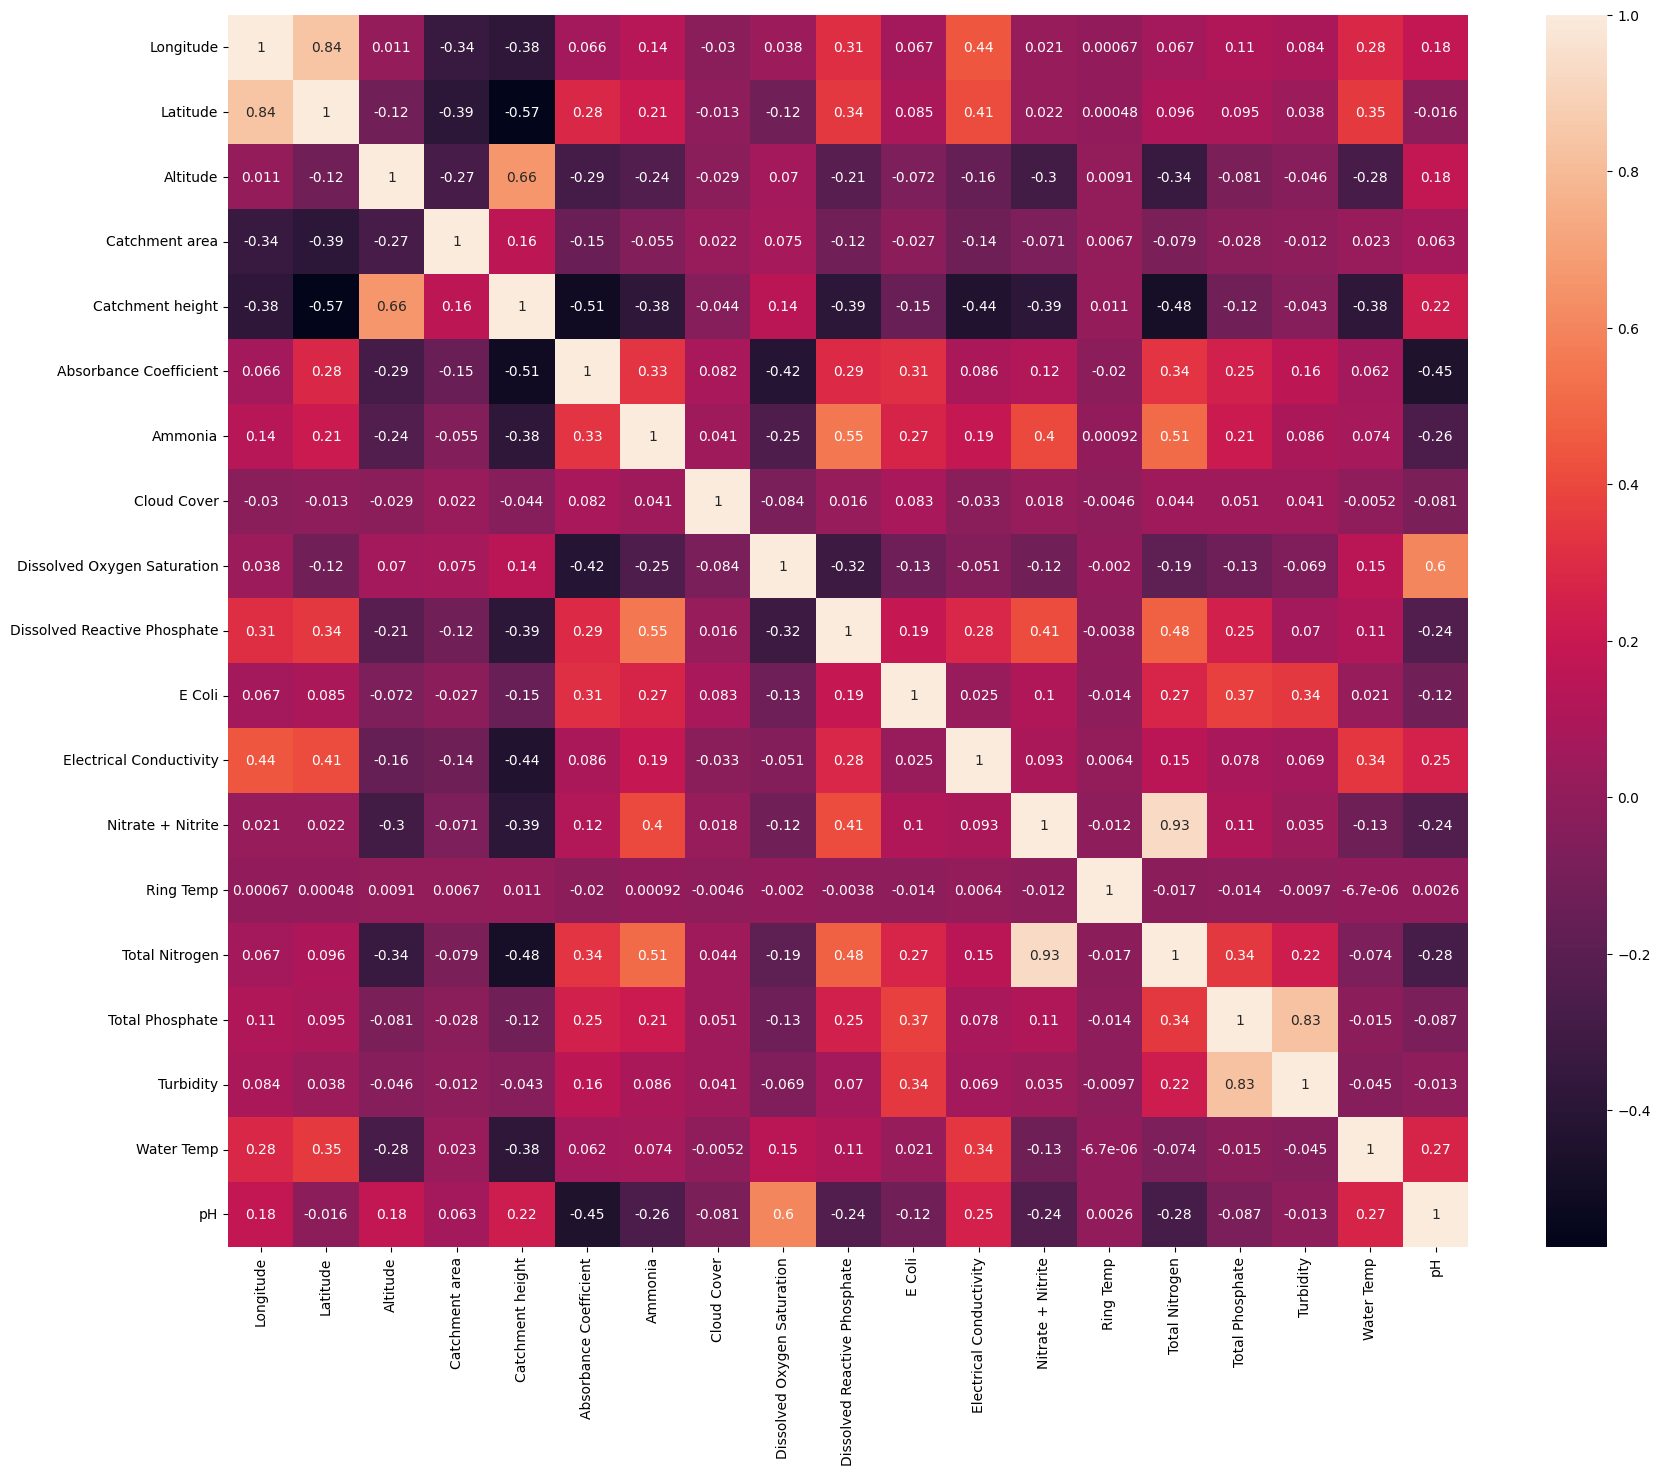

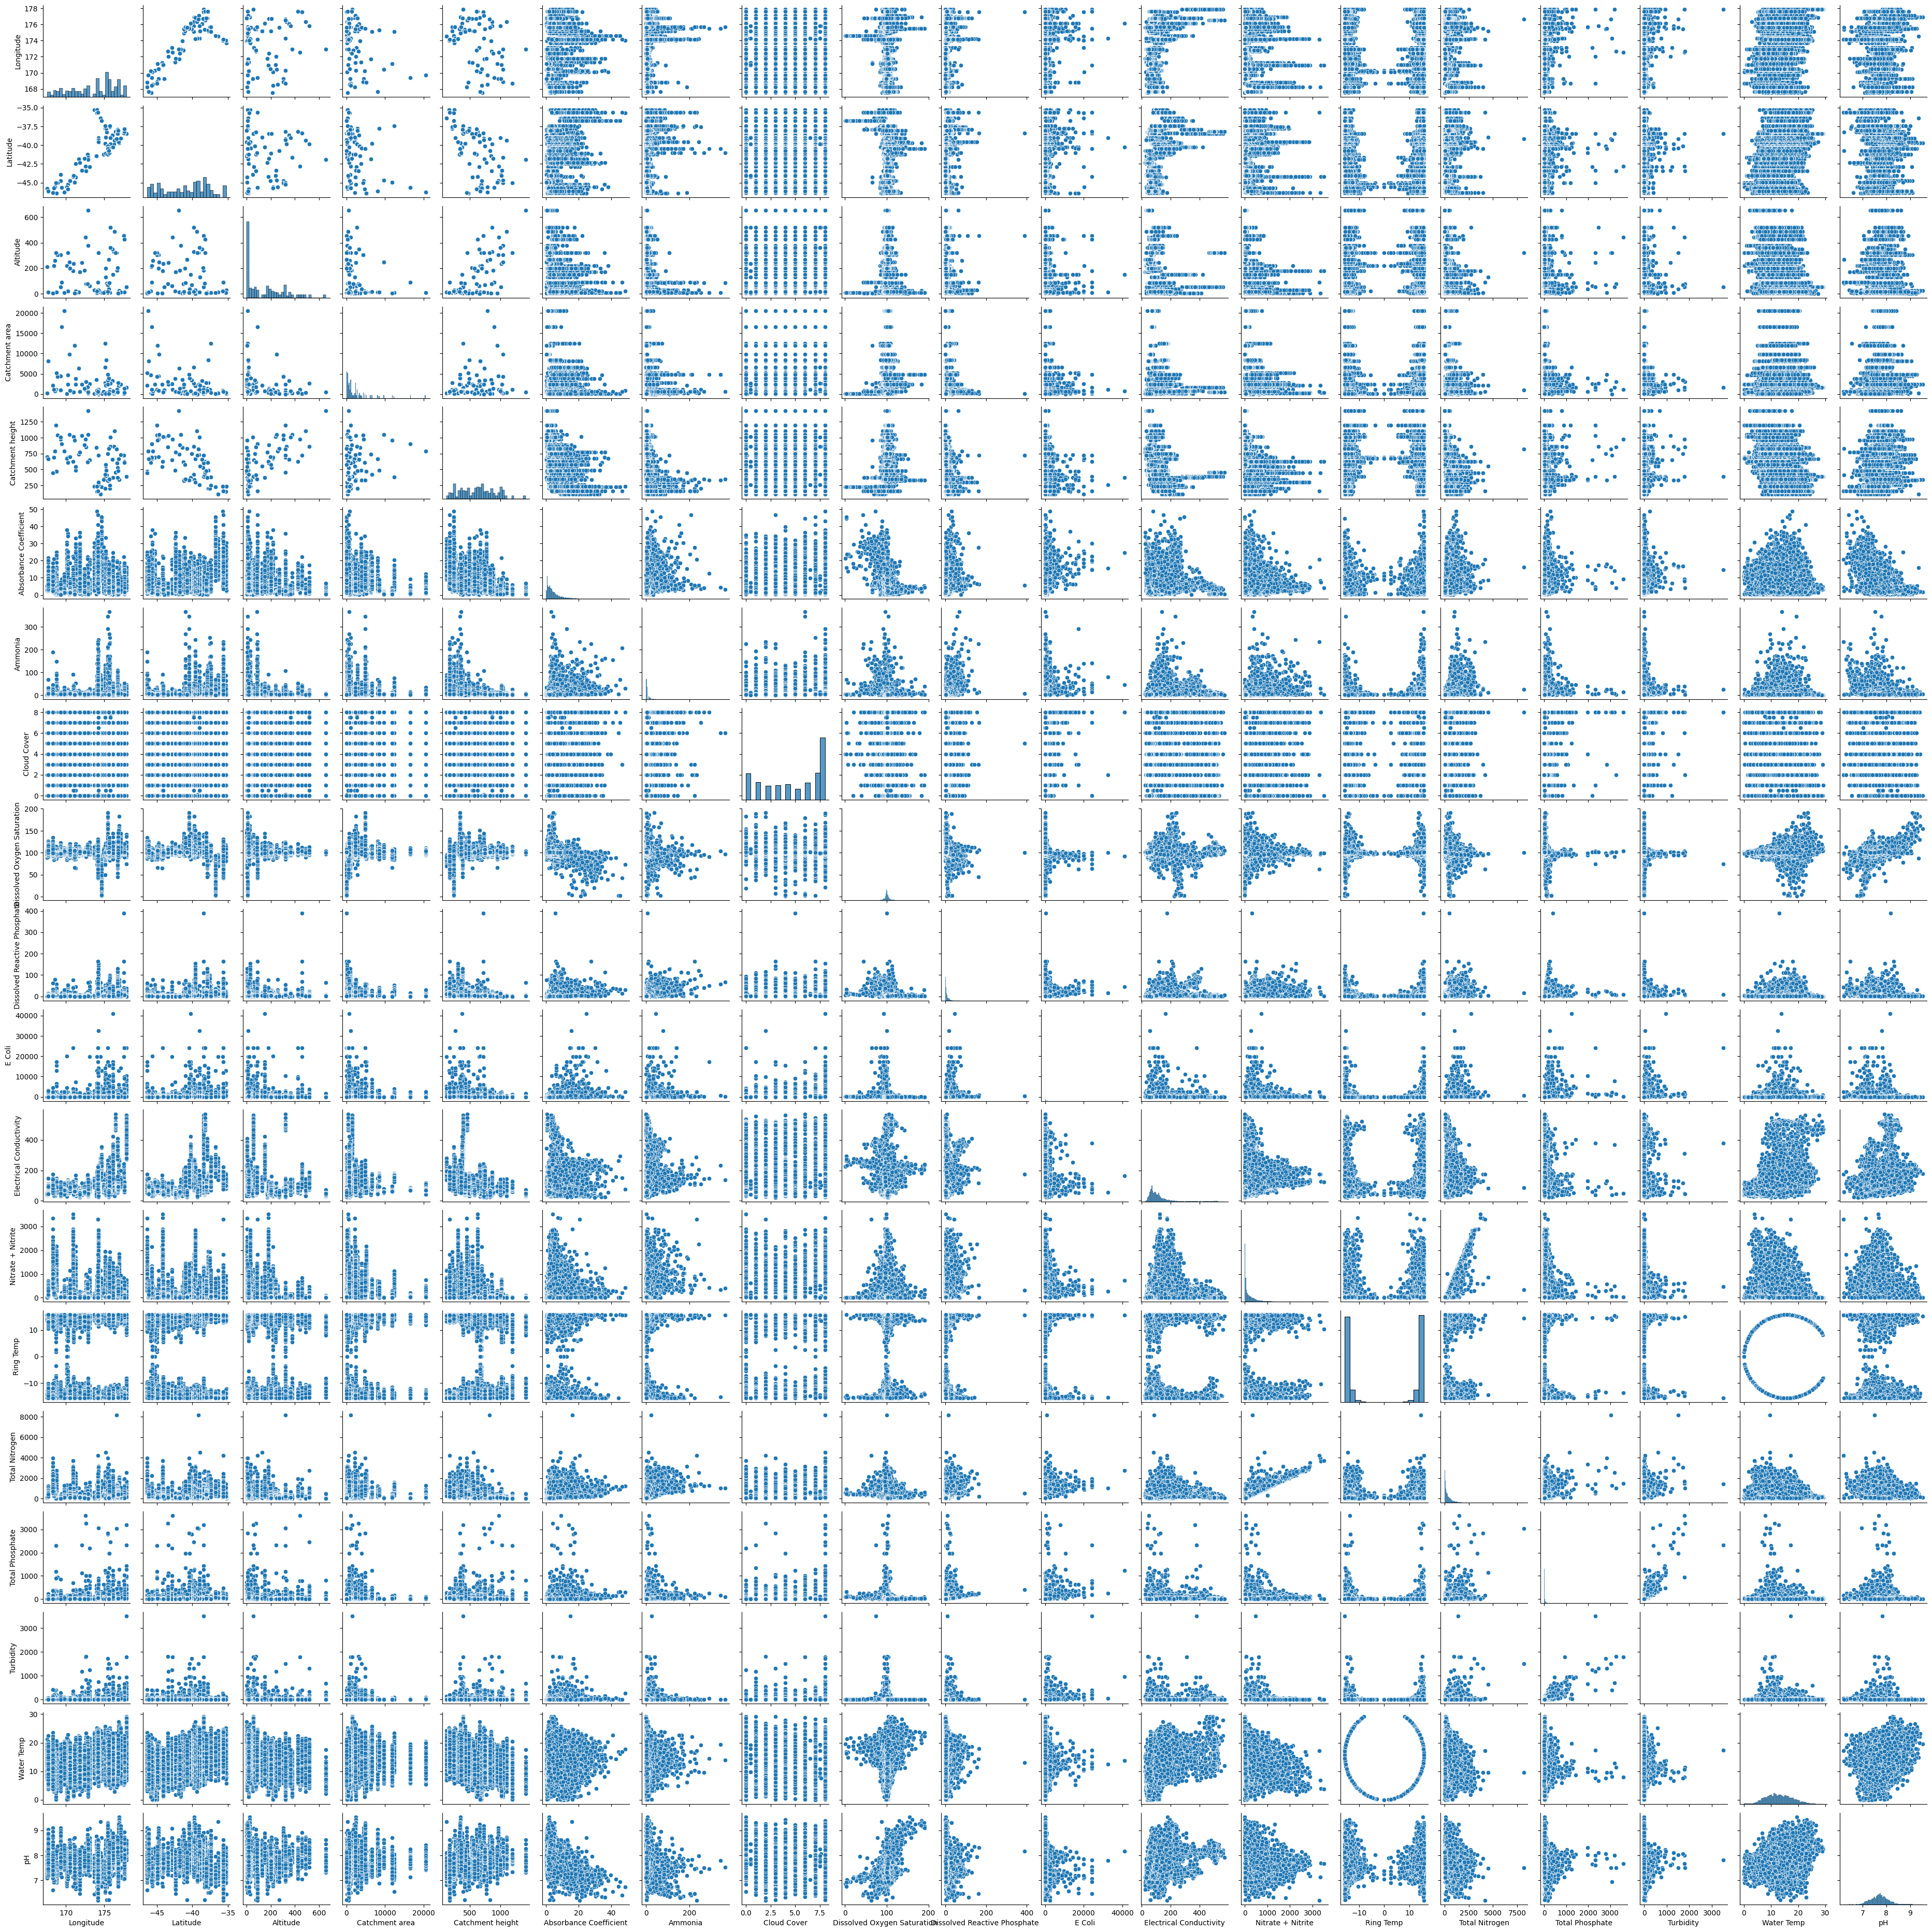

In [6]:
cdf = sites.merge(visits)


cdf= cdf.merge(measurements, how='inner')
cdf = cdf.drop('checksum', axis = 1)
cdf.info()
plt.figure(figsize=(20, 16))
sns.heatmap(cdf.corr(), annot=True)
plt.show()
sns.pairplot(cdf, height = 2)
plt.show()

#### Variable Removal

Merging the final data frame there are a lot of features that need to be removed.
* Absorbance Coefficeint correlates strongly with target variable pH and must be removed as it is redundant
* Catchment height correlates strongly with total nitrogen, latitude and the absorbance coefficient also making it redundant
* Timestamp doesn't tell us any meaningful information for modelling or data as we do not need to keep track of time so it is being removed,
* Catchment Area doesnt tell us any useful information either, as we are interested mainly on the measurements, the only correlations it has with the data is longitude and latitude information which makes its redundant
* Altitude is also not needed as it correlates strongly with nitrogen and nitrate + nitrate and water temp so it is redundant
* Site information data is being kept for extracting the E Coli information but will be removed after as it is not useful for supervised learning 
* Dissolved Reactive Phosphate correlates strongly with both pH and Dissolved Oxygen Saturation so it will be removed



In [7]:
sldf = cdf.drop(['Absorbance Coefficient', 'Nitrate + Nitrite', 'Catchment height', 'Timestamp', 'Catchment area', 'Altitude',  'Dissolved Reactive Phosphate'], axis =1)
sldf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13219 entries, 0 to 13218
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SiteID                       13219 non-null  object 
 1   Region                       13219 non-null  object 
 2   Name                         13219 non-null  object 
 3   Longitude                    13219 non-null  float64
 4   Latitude                     13219 non-null  float64
 5   Ammonia                      13219 non-null  float64
 6   Cloud Cover                  13219 non-null  float64
 7   Dissolved Oxygen Saturation  13219 non-null  float64
 8   E Coli                       13219 non-null  float64
 9   Electrical Conductivity      13219 non-null  float64
 10  Ring Temp                    13219 non-null  float64
 11  Total Nitrogen               13219 non-null  float64
 12  Total Phosphate              13219 non-null  float64
 13  Turbidity       

#### Extract E-Coli Information

In this section i will rite code to extract E coli readings greater than 550 per 100ml, I will group them by the appropriate site data, I will then aggregate them by counting the number of instances in each group and write the resulting aggregated data to a csv file sorted by count of instances.

In [8]:
ecoli = cdf[cdf['E Coli'] >= 550.0][['SiteID', 'Region', 'Name', 'Longitude', 'Latitude', 'E Coli']]



edict = ecoli["SiteID"].value_counts()
edict = edict.to_dict()
ecoli["E Coli"] = ecoli["SiteID"].map(edict)


ecoli = ecoli.drop_duplicates(subset = "SiteID").sort_values(by="E Coli", ascending = False).reset_index(drop= True)
ecoli.to_csv('bad_ecoli.csv', index=False)
ecoli

SiteID        Region                      Name   Longitude   Latitude  \
0     HM2      Hamilton       Waipa at Whatawhata  175.151645 -37.800344   
1     WA1      Wanganui    Waitara at Bertrand Rd  174.254867 -39.049664   
2     GS2      Gisborne      Waikohu at No. 1 Br.  177.561462 -38.416776   
3     DN5       Dunedin   Mataura at Seaward Down  168.797037 -46.391100   
4     WA4      Wanganui      Whanganui at Paetawa  175.142311 -39.788644   
..    ...           ...                       ...         ...        ...   
62    CH3  Christchurch      Waimakariri at Gorge  172.051061 -43.360696   
63    AX4     Alexandra    Clutha at Millers Flat  169.409976 -45.666362   
64    HV1  Havelock Nth     Makaroro at Burnt Br.  176.303767 -39.819630   
65    AX1     Alexandra     Clutha at Luggate Br.  169.279966 -44.730920   
66    HV4  Havelock Nth  Ngaruroro at Kuripapango  176.330403 -39.381692   

    E Coli  
0       69  
1       68  
2       67  
3       59  
4       44  
..     ...  
62       2  
63       2  
64       1  
65       1  
66       1  

[67 rows x 6 columns]

## Part 3 - Supervised Learning

### Setup

##### Cleanup CV Results dataframe function from lab 5

In [9]:
def cleanup_cv_results(cv_results, model_name='model', scale_name='scale'):
    import re
    
    ## remove the "param_"  and "param_model__" prefixes from columns
    r = re.compile(f"param_({model_name}__)*")
    cleaned_names = cv_results.rename(columns=lambda x: r.sub('', x))

    ## identify all the columns that are not the per-split cross validation scores
    r = re.compile(f"split.+_test_score")
    header_cols = [ c for c in cleaned_names.columns.values if not r.match(c) ]
    
    ## return the long version of the data
    return cleaned_names.melt(id_vars=header_cols, var_name='split', value_name='score')


Use pH as the target for Regression, and set up pipeline.

Drop site information and identifiers as it is not needed for supervised learning.

In [10]:
sldf = sldf.drop(['SiteID', 'Region', 'Name'], axis = 1)
folds = KFold(n_splits=10, shuffle=True, random_state=1234)
score = 'r2'
pipe = Pipeline([ ('scale', 'passthrough'), ('model', DummyRegressor()) ])
# Define target variables
target = 'pH'
X = sldf.drop(columns=[target]).to_numpy()
t = sldf[target].to_numpy()
feature_names = sldf.drop(columns=target).columns.values
sldf

Longitude   Latitude  Ammonia  Cloud Cover  \
0      174.516776 -36.387085      8.0          3.0   
1      174.516776 -36.387085      6.0          2.0   
2      174.516776 -36.387085      1.0          7.0   
3      174.516776 -36.387085     28.0          5.0   
4      174.516776 -36.387085     26.0          0.0   
...           ...        ...      ...          ...   
13214  175.604835 -40.763879      4.0          8.0   
13215  175.604835 -40.763879      1.0          3.0   
13216  175.604835 -40.763879      4.0          8.0   
13217  175.604835 -40.763879      4.0          8.0   
13218  175.604835 -40.763879      2.0          0.0   

       Dissolved Oxygen Saturation   E Coli  Electrical Conductivity  \
0                             88.9   120.00                    190.0   
1                             90.7    41.00                    204.0   
2                             89.6    86.00                    227.0   
3                             82.1   203.00                    207.0   
4                             88.5  1046.24                    198.0   
...                            ...      ...                      ...   
13214                        102.4     7.40                     64.5   
13215                        101.2     4.10                     32.6   
13216                         99.9     7.40                     39.4   
13217                        101.0   131.30                     38.0   
13218                        102.1     4.10                     54.8   

       Ring Temp  Total Nitrogen  Total Phosphate  Turbidity  Water Temp    pH  
0      15.070833           489.0             65.0       8.20        20.1  7.43  
1      15.370426           261.0             51.0       6.00        18.9  7.62  
2     -15.637455           283.0             48.0       4.90        14.3  7.66  
3     -15.699682          1269.0             77.0       9.50        15.6  7.22  
4      14.813845          1108.0             74.0      12.00        10.5  7.37  
...          ...             ...              ...        ...         ...   ...  
13214 -12.864292            65.0              3.0       1.88         6.7  7.74  
13215 -14.150972            92.0             17.0      10.30         8.9  7.10  
13216  14.291256            95.0              5.0       2.81         9.2  7.32  
13217  15.429841           123.0              8.0       3.61        12.8  7.49  
13218  15.699682            80.0              5.0       0.73        15.8  7.67  

[13219 rows x 13 columns]

#### Linear Regression


In [11]:
lr = LinearRegression()

lm_tune_grid = {
    'model' : lr
}
pipe.set_params(**lm_tune_grid)

lrcv = cross_val_score(pipe, X, t, cv=folds, n_jobs=-1, scoring='r2').mean()

print(f"linear regression cross validation score: {lrcv}")

mdl = LinearRegression().fit(X, t)
model_details = pd.DataFrame({
    'input_variable' : np.hstack([ 'intercept', feature_names ]),
    'coefficient' : np.hstack([ mdl.intercept_, mdl.coef_ ])
})
model_details

linear regression cross validation score: 0.5290565050448808


input_variable  coefficient
0                     intercept    -3.403591
1                     Longitude     0.040786
2                      Latitude    -0.041764
3                       Ammonia    -0.001671
4                   Cloud Cover    -0.001960
5   Dissolved Oxygen Saturation     0.021158
6                        E Coli    -0.000003
7       Electrical Conductivity     0.001259
8                     Ring Temp    -0.000021
9                Total Nitrogen    -0.000145
10              Total Phosphate    -0.000008
11                    Turbidity     0.000254
12                   Water Temp     0.010660

Some interesting takeaways
* For every additional unit of longitude, the prediction for pH will increase by 0.04, showing as you go north the more likely you are to have a higher pH
* For every additional unit of dissolved oxygen saturation, the prediction for pH will increase by 0.02.
* As Total nitrogen increases, predicted pH of the water will decrease, the value is only by -0.000145 however nitrogen comes in larger quantities so this has a significant effect on the pH

#### K-Nearest Neighbours

Best Parameters : {'model': KNeighborsRegressor(), 'model__n_neighbors': 5, 'scale': StandardScaler()}, Best Score: 0.7324865814855152


[None]

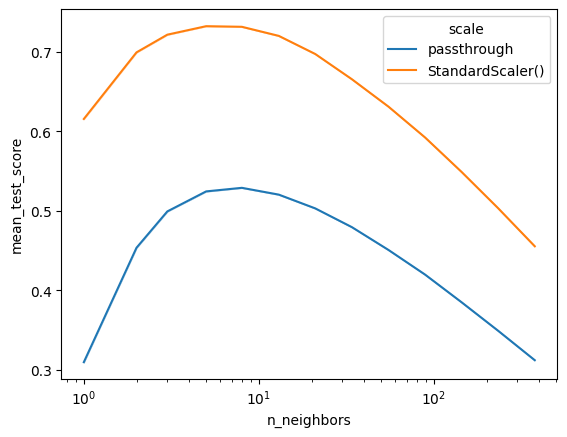

In [12]:


scale = StandardScaler()
knn = KNeighborsRegressor()

all_k = [ 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377 ]

knn_tune_grid = {
    'scale' : [ 'passthrough', scale ],
    'model' : [ knn ],
    'model__n_neighbors' : all_k
}

cv = GridSearchCV(pipe, knn_tune_grid, cv=folds, n_jobs=1 , scoring= 'r2')
cv.fit(X, t)
print(f'Best Parameters : {cv.best_params_}, Best Score: {cv.best_score_}')

knr = pd.DataFrame(cv.cv_results_)
knr = cleanup_cv_results(knr)
knr
knn_plot = sns.lineplot(data=knr, x='n_neighbors', y='mean_test_score', hue='scale')
knn_plot.set(xscale='log')

#### CART Decision Tree

Best Parameters : {'model': DecisionTreeRegressor(min_samples_split=89), 'model__min_samples_split': 89, 'scale': 'passthrough'}, Best Score: 0.7703160121999802


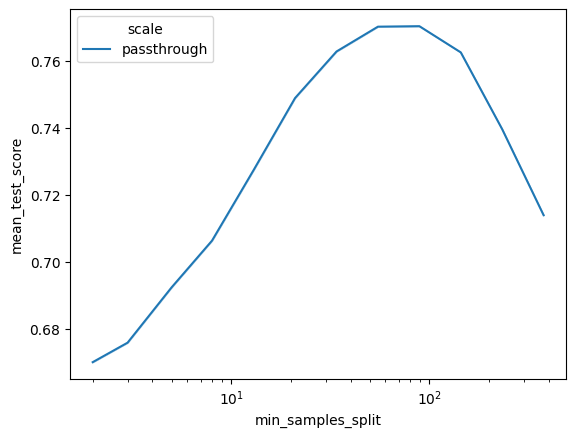

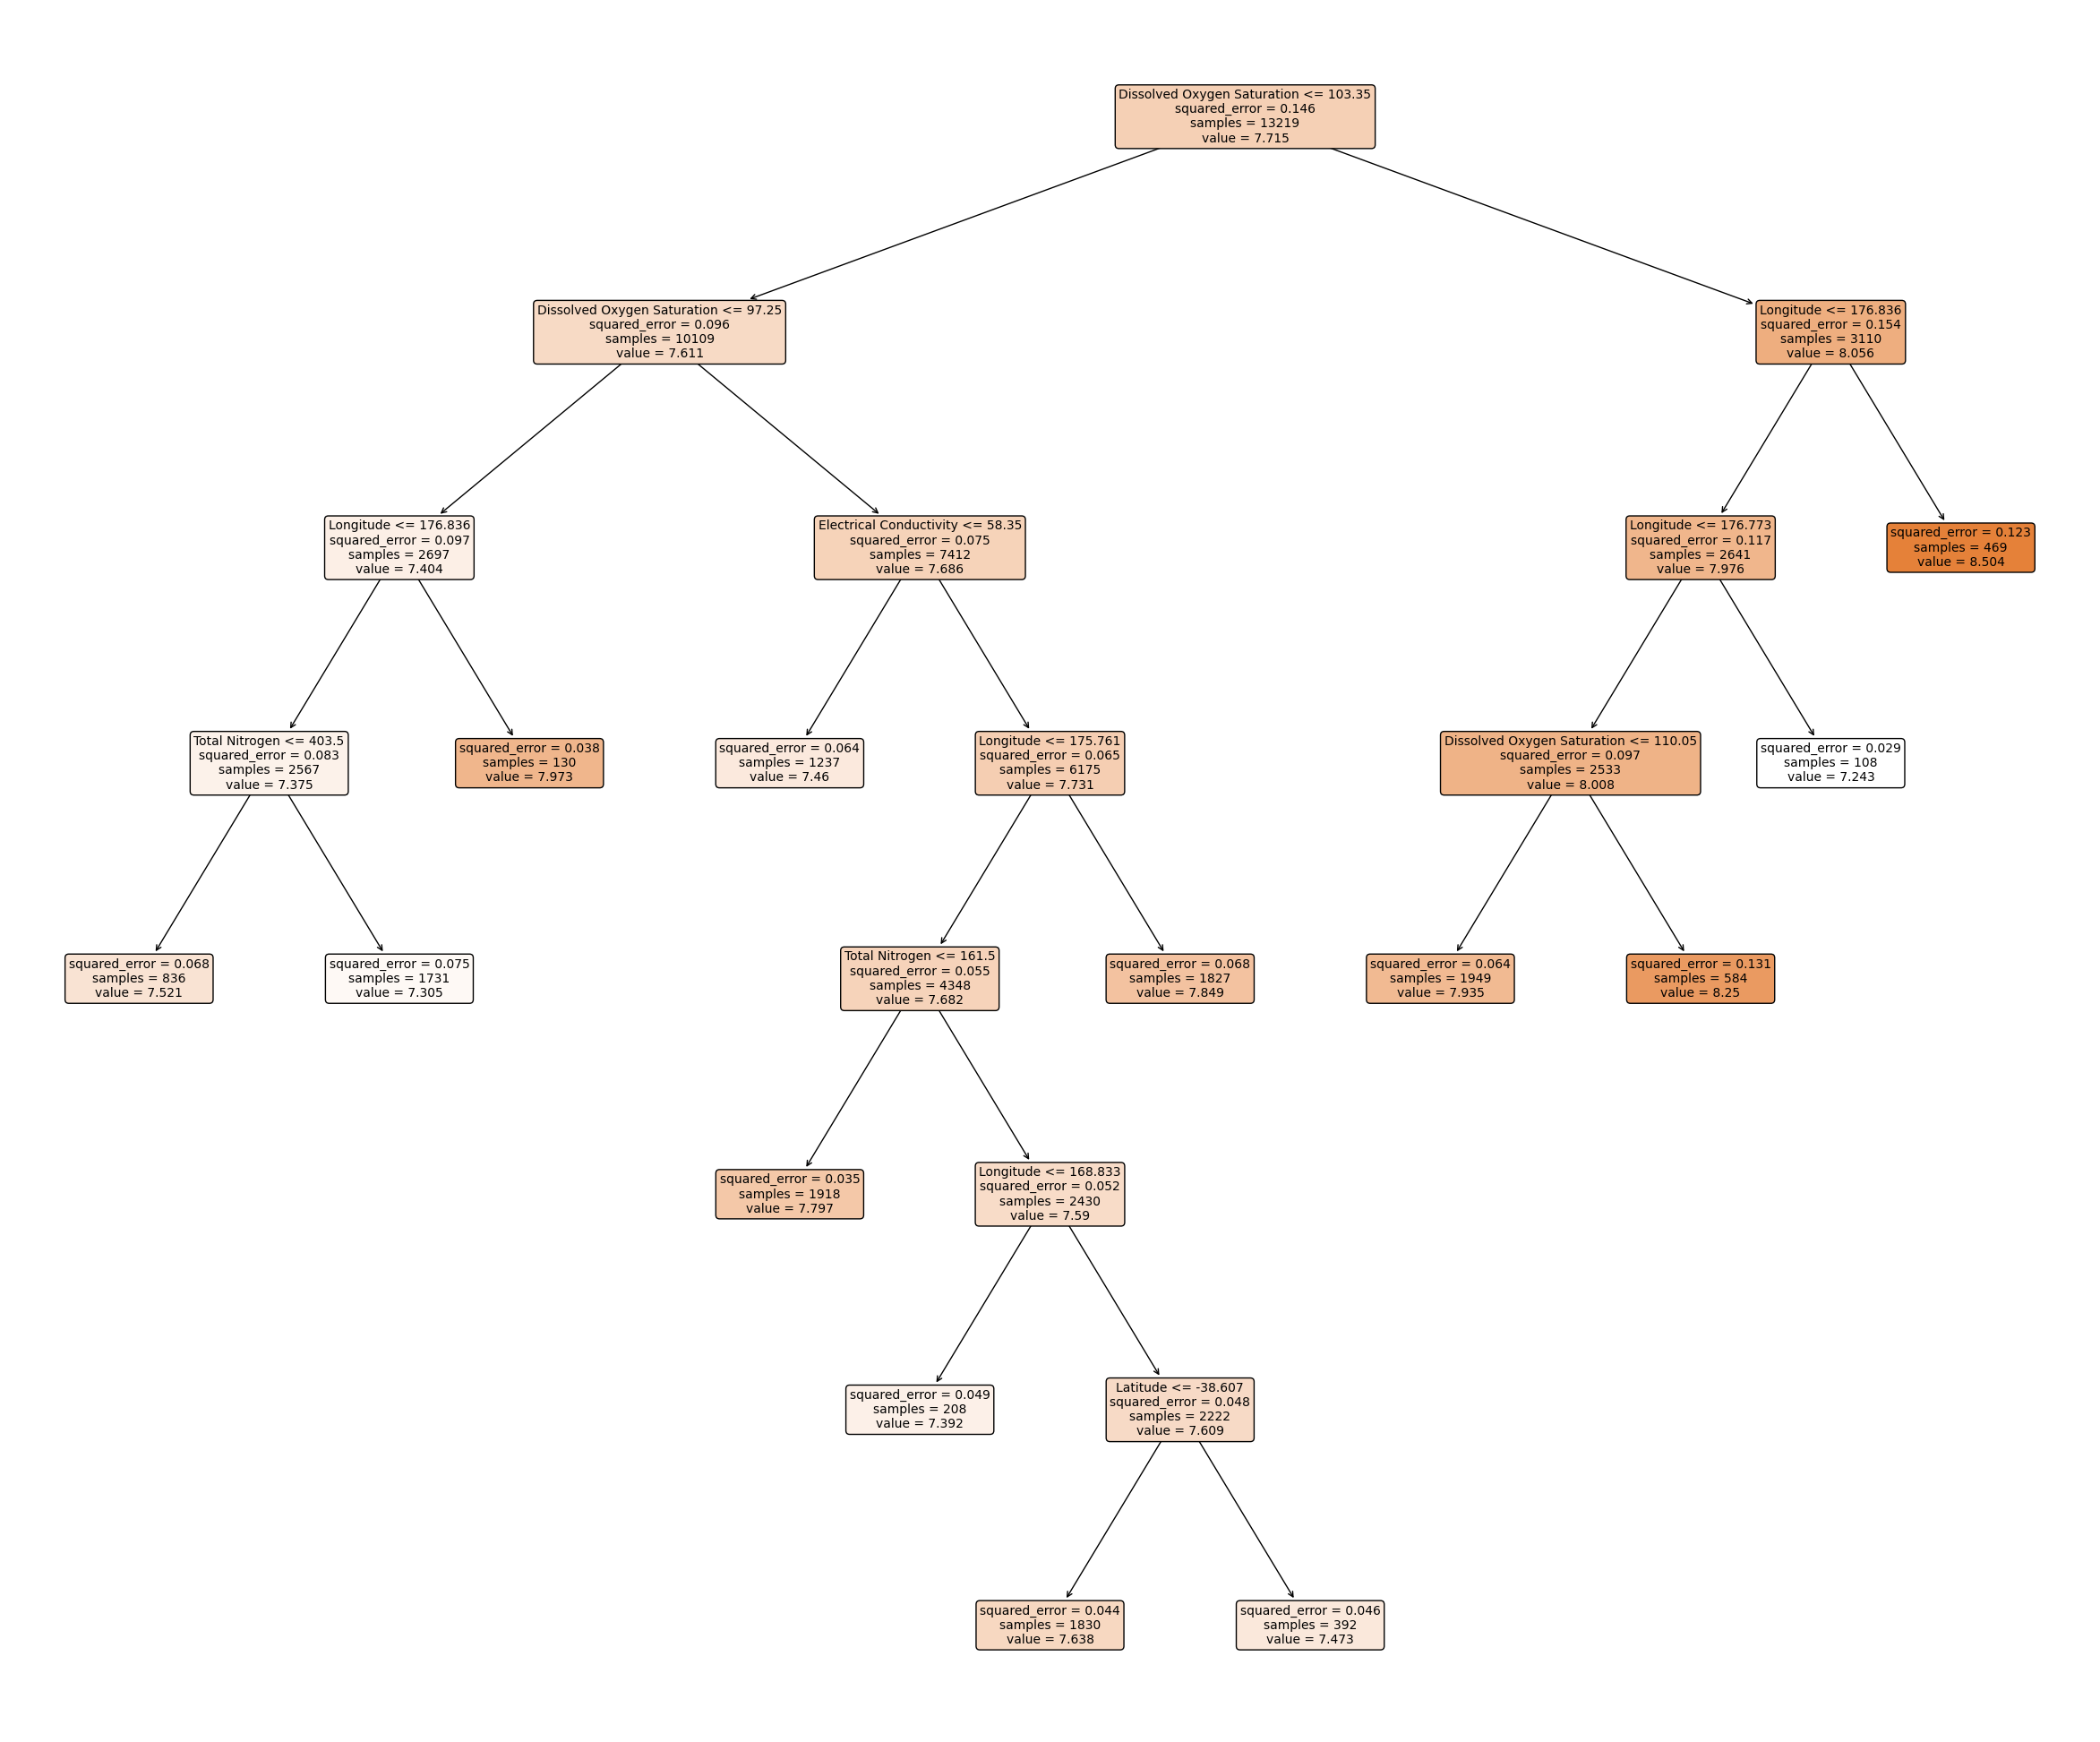

In [13]:
cart = DecisionTreeRegressor()
all_split = [2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]
cart_tune_grid = {
    'scale' : [ 'passthrough'],
    'model' : [ cart ],
    'model__min_samples_split' : all_split
}

cartsearch = GridSearchCV(pipe, cart_tune_grid, cv=folds, n_jobs=-1, scoring = score)
cartsearch.fit(X, t)


print(f'Best Parameters : {cartsearch.best_params_}, Best Score: {cartsearch.best_score_}')

cdt = pd.DataFrame(cartsearch.cv_results_)
cdt = cleanup_cv_results(cdt)
cdt
cdt_plot = sns.lineplot(data=cdt, x='min_samples_split', y='mean_test_score', hue='scale')
cdt_plot.set(xscale='log')

tree = DecisionTreeRegressor(random_state=0, min_samples_split=2000)
tree.fit(X, t)
plt.figure(figsize=(30,25))
plot_tree(tree, rounded=True, filled=True, feature_names=feature_names);

This mimics the linear model shown as longitude increases, so does the value of pH as you can see by the tree. This is similar to how higher values of dissolved oxygen saturation also mean a higher pH value, just like the linear regression model earlier. One again, just like the linear model the amount of nitrogen increasing, decreases the predicted pH value on average.

## Part 4 - Final Analysis

Plots for Analysis


{'model': DecisionTreeRegressor(min_samples_split=89), 'model__min_samples_split': 89, 'scale': 'passthrough'} 0.7703965762431597


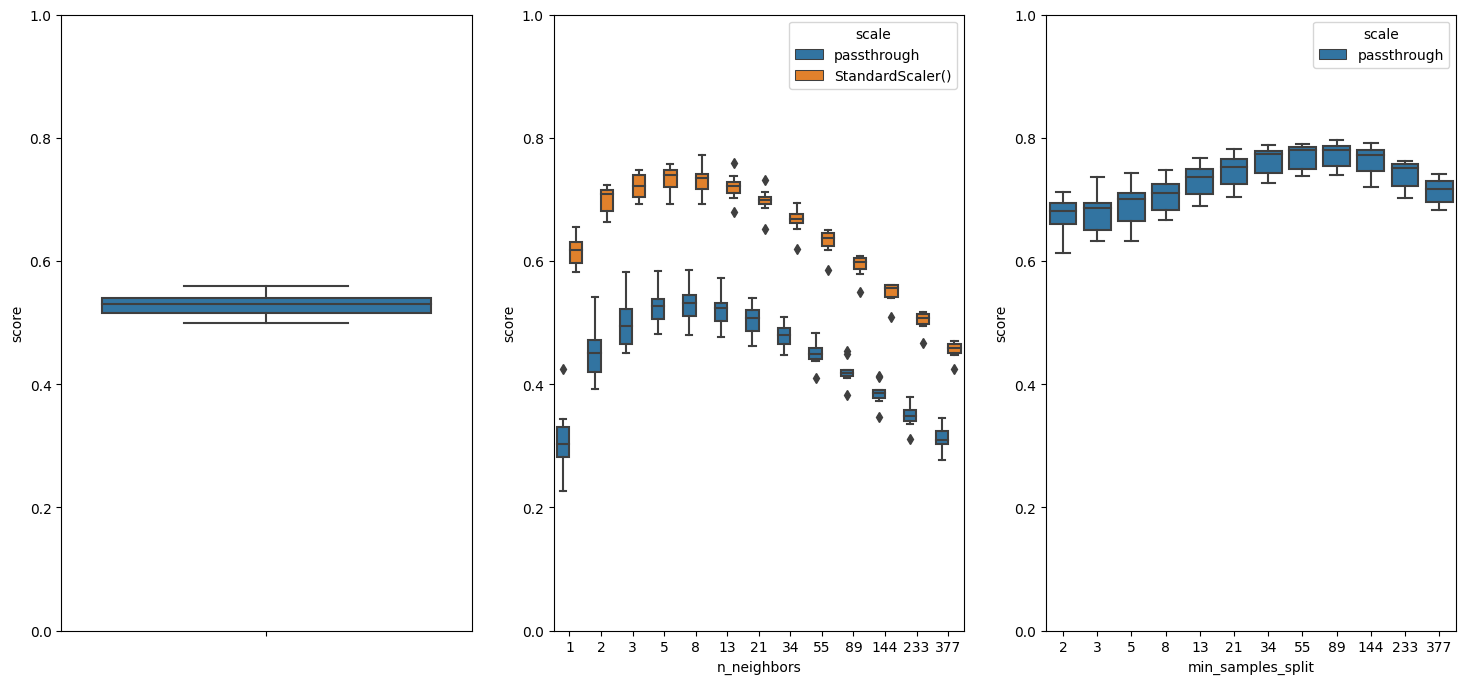

In [14]:
lm_tune_grid = {
    'scale' : [ 'passthrough' ],
    'model' : [ lr ]
}

knn_tune_grid = {
    'scale' : [ 'passthrough', scale ],
    'model' : [ knn ],
    'model__n_neighbors' : all_k
}

cmp_tune_grid = [
    lm_tune_grid,
    knn_tune_grid,
    cart_tune_grid
]

cv = GridSearchCV(pipe, cmp_tune_grid, cv=folds, n_jobs=-1, scoring='r2')
cv.fit(X, t)
print(cv.best_params_, cv.best_score_)

clean = cleanup_cv_results(pd.DataFrame(cv.cv_results_))

fig, axs = plt.subplots(1, 3, figsize=(18, 8))
sns.boxplot(data=clean[clean['model']==lr], y='score', ax=axs[0])
sns.boxplot(data=clean[clean['model']==knn], x='n_neighbors', y='score', hue='scale', ax=axs[1])
sns.boxplot(data=clean[clean['model']==cart], x='min_samples_split', y='score', hue='scale', ax=axs[2])
axs[0].set(ylim=(0, 1))
axs[1].set(ylim=(0, 1))
axs[2].set(ylim=(0, 1))
plt.show()

Looking at all the models and comparing the results its clear to see that the linear model preformed very poorly compared to kNN and CART with an r^2 score of 0.53 meaning that only 53% of the variance in output can be explained by the inputs. This can be explained easily by looking at the figure plot done on the final dataframe during the EAD portion, while there are many plots and it may be hard to interpret, at a glance you can see that there is a general lack of strong linear relationships between most of the variables so it is no suprise that linear regression as even using EDA, cases where there are no strong linear relationships, linear models will struggle. 

kNN preforms much better than the linear model, with a r^2 score of 0.73 when n_neighbours is 5 meaning that 73%  of the outputs could be explained by the inputs, as predicted in the EAD phase, scaling was required for kNN due to the high standard deviation of the variables in the data. The scaled version preformed much better than the non scaled version. However kNN still did lose out to CART as it still doesn't do the best on data with high standard deviation, even with scaling.

CART works the best here, with an r^2 score of 0.77 with a min_split value of 89, meaning that 77% of the variance in outputs can be explained by the inputs. This makes sense as CART does very well, as looking at the data, despite the relationships not being strongly linear, a lot of the relationships are still strong and CART will do well with strong relationships, even if they are not linear.

The reason we tested on things such as pH, Turbidity and Dissolved Oxygen Saturation which are super easy to measure is because regression describes the relationship between independent and dependent variables, meaning that we can interpret the relationship both ways. pH is easy to measure and as such it is useful to build a regression model on it as it is easy to test the accuracy of it, and if we have  a reliable model we can use it to explain the relationship between some of the more difficult to measure variables/